In [2]:
import requests 
import geopandas as gdp
import pandas as pd
#Calling HoyodeCrimen's API to retrieve a GEOJSON containing the polygons of Mexico City
url = requests.get("https://hoyodecrimen.com/api/v1/sectores/geojson")

#Converting the incoming data and checking the CRS format it comes with
filepath = url.text
cdmx = gdp.read_file(filepath)

#Conversion to Mexico City's CRS format
cdmx = cdmx.to_crs(6362)

df = pd.DataFrame(cdmx)

#For the other csv an online converter was used with the url https://hoyodecrimen.com/api/v1/sectores/all/crimes/all/period/change

df.head



<bound method NDFrame.head of              sector cve_mun            municipio  \
0    ABASTO-REFORMA    9007           IZTAPALAPA   
1             ALPES    9010       ALVARO OBREGON   
2   ANGEL-ZONA ROSA    9015           CUAUHTEMOC   
3            ARAGON    9005     GUSTAVO A MADERO   
4            ARENAL    9017  VENUSTIANO CARRANZA   
..              ...     ...                  ...   
67       TLATELOLCO    9015           CUAUHTEMOC   
68      UNIVERSIDAD    9003             COYOACAN   
69        XOTEPINGO    9003             COYOACAN   
70        ZAPOTITLA    9011              TLAHUAC   
71         ZARAGOZA    9017  VENUSTIANO CARRANZA   

                                             geometry  
0   POLYGON ((2808283.835 819339.207, 2808174.639 ...  
1   POLYGON ((2786290.411 814710.223, 2786259.251 ...  
2   POLYGON ((2795560.167 827622.478, 2795526.952 ...  
3   POLYGON ((2806178.253 830952.041, 2805746.645 ...  
4   POLYGON ((2805007.959 826432.874, 2805333.393 ...  
..       

In [3]:
print(df.columns)

Index(['sector', 'cve_mun', 'municipio', 'geometry'], dtype='object')


In [4]:
sector_list = df["sector"].unique()

In [10]:
sector_list.reshape(72,)

array(['ABASTO-REFORMA', 'ALPES', 'ANGEL-ZONA ROSA', 'ARAGON', 'ARENAL',
       'ASTURIAS', 'BUENAVISTA', 'CHAPULTEPEC', 'CHURUBUSCO', 'CLAVERIA',
       'COAPA', 'CONGRESO', 'CONSULADO', 'CORREDOR-CENTRO', 'COYOACAN',
       'CUAJIMALPA', 'CUAUTEPEC', 'CUCHILLA', 'CUITLAHUAC', 'CULHUACAN',
       'DEL VALLE', 'DINAMO', 'EL YAQUI', 'ESTRELLA', 'FUENTE', 'GRANJAS',
       'HORMIGA', 'HUIPULCO-HOSPITALES', 'IZTACCIHUATL', 'LA NORIA',
       'LA RAZA', 'LINDAVISTA', 'MERCED-BALBUENA', 'MILPA ALTA',
       'MIXCALCO-HERALDO', 'MIXQUIC', 'MOCTEZUMA', 'MORELOS', 'NAPOLES',
       'NARVARTE-ALAMOS', 'NATIVITAS', 'OASIS', 'PADIERNA', 'PANTITLAN',
       'PLATEROS', 'POLANCO-CASTILLO', 'PORTALES', 'PRADERA', 'QUETZAL',
       'QUIROGA', 'REVOLUCION-ALAMEDA', 'ROMA', 'SAN ANGEL',
       'SAN JERONIMO', 'SANTA CRUZ', 'SANTA FE', 'SOTELO', 'TACUBA',
       'TACUBAYA', 'TAXQUEÑA', 'TECOMITL', 'TEOTONGO', 'TEPEPAN',
       'TEPEYAC', 'TEZONCO', 'TICOMAN', 'TLACOTAL', 'TLATELOLCO',
       'UNIVERSIDA

In [11]:
from libpysal import weights
queen = weights.Queen.from_dataframe(cdmx)

/var/folders/4z/h2pgwyh50h14m0vydbbz17y00000gn/T/ipykernel_56411/796701889.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen = weights.Queen.from_dataframe(cdmx)


In [12]:
mapCDMX = queen.to_networkx()

In [13]:
print(mapCDMX)

Graph with 72 nodes and 186 edges


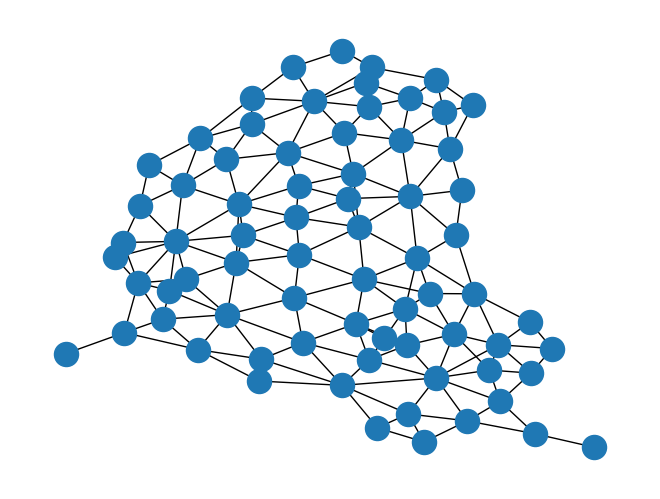

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(mapCDMX)
plt.show()

In [16]:
pd.DataFrame(sector_list).to_csv("mapCDMX.csv")